# Optimización del Rendimiento del Equipo B en League of Legends: Análisis y Estrategias

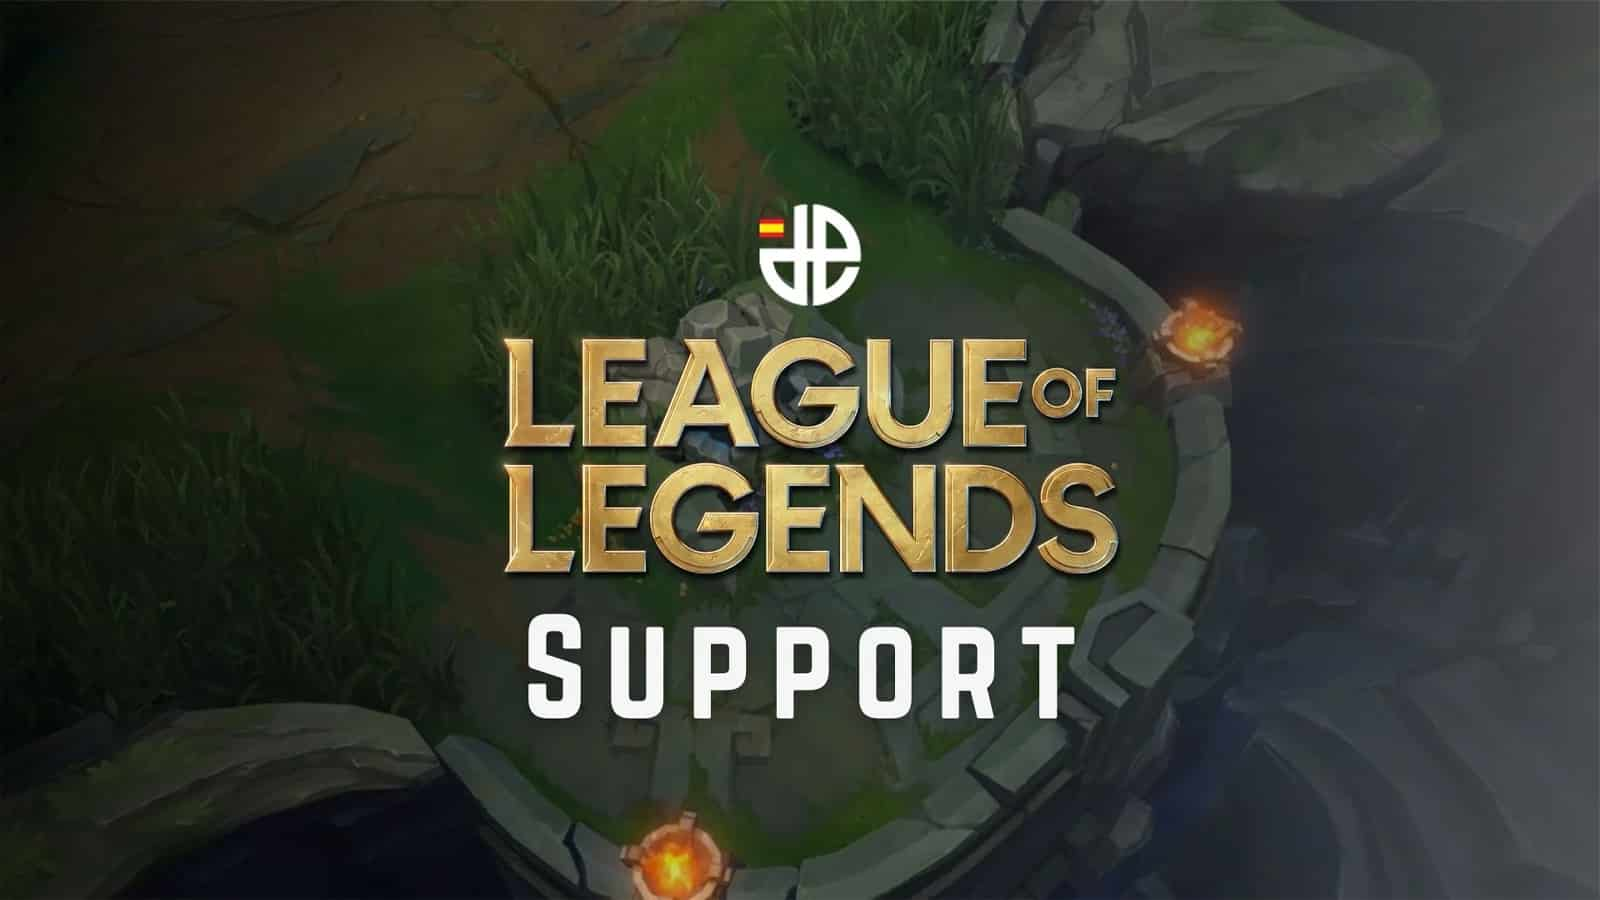

## ¿Que es League of Legends?
League of Legends es un juego de estrategia por equipos en el que dos equipos conformados por cinco poderosos campeones se enfrentan para destruir la base del otro. Elige de entre más de 140 campeones para realizar jugadas épicas, asegurar asesinatos y destruir torretas mientras avanzas hacia la victoria.

[leagueoflegends.com](https://www.leagueoflegends.com/es-mx/how-to-play/#:~:text=League%20of%20Legends%20es%20un,mientras%20avanzas%20hacia%20la%20victoria.)

## Entregas:
- [Estructurando un Proyecto de DS (parte I)](https://colab.research.google.com/drive/1G7wMNy01128QyQWhwtiqmbYVyn0P6oXc?usp=sharing)
- [Estructurando un Proyecto de DS (parte II)](https://colab.research.google.com/drive/1CxvFrQcTOIh3wmUbl4gih06AwiSWPNoJ?usp=sharing)
- [Evaluando modelos ML](https://colab.research.google.com/drive/1D9CD57iQ4tv2rgPkkVY2N0Jo66EYHn2n?usp=sharing)

In [ ]:
# Instalacion de libreria necesarias
! pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download'
od.download(dataset_url)

Skipping, found downloaded files in "./league-of-legends-diamond-ranked-games-10-min" (use force=True to force download)


In [ ]:
df = pd.read_csv("/content/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv")

## Consigna:
- elegir un método de feature selection para reducir la dimensionalidad del dataset,
- elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,
- cálculo de métricas para validar el modelo
- generar conclusiones con base en los resultados obtenidos.


In [ ]:
# Importacion de Plotly como libreria de DataViz
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels.api as sm

## EDA - Etapa II

In [ ]:
droppedVariables = ["gameId", "blueFirstBlood", "blueEliteMonsters", "blueTotalGold", "blueTotalExperience", "blueTotalMinionsKilled", "blueTotalJungleMinionsKilled", "blueCSPerMin", "blueGoldPerMin", "redFirstBlood", "redKills", "redDeaths", "redAssists", "redEliteMonsters", "redTotalGold", "redTotalExperience", "redTotalMinionsKilled", "redTotalJungleMinionsKilled", "redGoldDiff", "redExperienceDiff", "redCSPerMin", "redGoldPerMin"]
dataCleaned = df.drop(droppedVariables, axis = 1)
dataCleaned

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redDragons,redHeralds,redTowersDestroyed,redAvgLevel
0,0,28,2,9,6,11,0,0,0,6.6,643,-8,15,6,0,0,0,6.8
1,0,12,1,5,5,5,0,0,0,6.6,-2908,-1173,12,1,1,1,1,6.8
2,0,15,0,7,11,4,1,0,0,6.4,-1172,-1033,15,3,0,0,0,6.8
3,0,43,1,4,5,5,0,1,0,7.0,-1321,-7,15,2,0,0,0,7.0
4,0,75,4,6,6,6,0,0,0,7.0,-1004,230,17,2,1,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,7,4,5,1,0,0,7.2,2519,2469,46,3,0,0,0,6.8
9875,1,54,0,6,4,8,1,0,0,7.2,782,888,12,21,0,0,0,7.0
9876,0,23,1,6,7,5,0,0,0,7.0,-2416,-1877,14,0,1,0,0,7.4
9877,0,14,4,2,3,3,1,0,0,6.6,-839,-1085,66,4,0,0,0,7.2


In [ ]:
plot_variables = ["blueKills", "blueAssists", "blueDeaths", "blueWardsPlaced", "blueWardsDestroyed", "blueGoldDiff", "blueExperienceDiff"]

fig = px.scatter_matrix(
    dataCleaned,
    dimensions=plot_variables,
    color="blueWins",
    height=600,
    width=600,
    opacity=0.7,
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(title="Matriz de Dispersión para Variables Seleccionadas")
fig.show()

In [ ]:
correlation = dataCleaned.corr()
correlation

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redDragons,redHeralds,redTowersDestroyed,redAvgLevel
blueWins,1.000000,0.000087,0.044247,0.337358,-0.339297,0.276685,0.213768,0.092385,0.115566,0.357820,0.511119,0.489558,-0.023671,-0.055400,-0.209516,-0.097172,-0.103696,-0.352127
blueWardsPlaced,0.000087,1.000000,0.034447,0.018138,-0.002612,0.033217,0.017676,0.010104,0.009462,0.034349,0.015800,0.027943,-0.012906,0.115549,-0.020121,-0.011964,-0.008225,-0.008882
blueWardsDestroyed,0.044247,0.034447,1.000000,0.033748,-0.073182,0.067793,0.040504,0.016940,-0.009150,0.060294,0.078585,0.077946,0.135966,0.123919,-0.034439,-0.012712,-0.023943,-0.059090
blueKills,0.337358,0.018138,0.033748,1.000000,0.004044,0.813667,0.170436,0.076195,0.180314,0.434867,0.654148,0.583730,-0.034239,-0.092278,-0.207949,-0.104423,-0.082491,-0.412219
blueDeaths,-0.339297,-0.002612,-0.073182,0.004044,1.000000,-0.026372,-0.188852,-0.095527,-0.071441,-0.414755,-0.640000,-0.577613,0.008102,0.038672,0.150746,0.076639,0.156780,0.433383
blueAssists,0.276685,0.033217,0.067793,0.813667,-0.026372,1.000000,0.170873,0.028434,0.123663,0.292661,0.549761,0.437002,-0.032474,-0.064501,-0.189563,-0.058074,-0.060880,-0.356928
blueDragons,0.213768,0.017676,0.040504,0.170436,-0.188852,0.170873,1.000000,0.020381,0.039750,0.160683,0.233875,0.211496,-0.027102,-0.023049,-0.631930,-0.016827,-0.032865,-0.149806
blueHeralds,0.092385,0.010104,0.016940,0.076195,-0.095527,0.028434,0.020381,1.000000,0.217901,0.128201,0.162943,0.162496,0.005653,0.019885,0.022035,-0.210012,-0.042872,-0.087337
blueTowersDestroyed,0.115566,0.009462,-0.009150,0.180314,-0.071441,0.123663,0.039750,0.217901,1.000000,0.124453,0.294060,0.218320,0.003660,-0.038623,-0.028482,-0.031973,0.011738,-0.204429
blueAvgLevel,0.357820,0.034349,0.060294,0.434867,-0.414755,0.292661,0.160683,0.128201,0.124453,1.000000,0.653538,0.718822,0.001020,-0.052770,-0.137854,-0.100798,-0.183090,-0.228466


## Aplicacion de Moldelos

### Aplicar K-nn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
X = dataCleaned.drop("blueWins", axis = 1)
y = dataCleaned["blueWins"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [ ]:
def model_train_test(model):
    model.fit(X_train_scaled, y_train)
    y_predict = model.predict(X_test_scaled)
    print(classification_report(y_test, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)

In [ ]:
max_accuracies = {}
score = []

for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score.append(knn.score(X_test_scaled, y_test))

fig = go.Figure()

fig.add_trace(go.Scatter(x=list(range(1, 25)), y=score, mode='lines+markers'))
fig.update_xaxes(tickvals=list(range(1, 25)))
fig.update_layout(
    title="Variación de la precisión con el número de vecinos (K-Nearest Neighbors)",
    xaxis_title="Números de vecinos",
    yaxis_title="Exactitud",
)

max_accuracy = max(score) * 100
max_accuracy_K = score.index(max(score)) + 1

print("La máxima precisión de K-Vecinas más cercanas es {:.2f}%".format(max_accuracy),
      "Con el número de vecinas establecida en", max_accuracy_K, "neighbours.")

fig.show()

La máxima precisión de K-Vecinas más cercanas es 70.29% Con el número de vecinas establecida en 19 neighbours.


### Aplicar PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
selected_features = df[plot_variables]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)


In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=principal_components, columns=['Componente 1', 'Componente 2', 'Componente 3'])


In [ ]:
df_pca = pd.concat([df[['blueWins']], pca_df], axis=1)

fig = px.scatter_3d(df_pca, x='Componente 1', y='Componente 2', z='Componente 3', color='blueWins',
                    labels={'Componente 1': 'Componente Principal 1', 'Componente 2': 'Componente Principal 2', 'Componente 3': 'Componente Principal 3'},
                    title='Datos de Partidas Clasificatorias en el Espacio de Componentes Principales',
                    color_continuous_scale=px.colors.sequential.Viridis)
fig.show()


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNN on PCA-transformed data: {:.2f}%".format(accuracy * 100))

Accuracy of KNN on PCA-transformed data: 99.85%
